In [2]:
import pandas as pd

# Load the CSV file
data = pd.read_csv("updated_predictions.csv")

# Count occurrences of each prediction in the "Prediction" column
prediction_counts = data['Prediction'].value_counts()

print(prediction_counts)


Prediction
no classification    2961
Name: count, dtype: int64


In [3]:
import pandas as pd

# Load the CSV file
data = pd.read_csv("updated_predictions.csv")

# Group the data by the 'Prediction' column and calculate the mean of the 'Confidence' column for each group
average_confidence = data.groupby('Prediction')['Confidence'].mean()

print(average_confidence)


Prediction
no classification    0.0
Name: Confidence, dtype: float64


/tmp/ipykernel_115/2684252203.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=prediction_counts.index, y=prediction_counts.values, palette="viridis")
/tmp/ipykernel_115/2684252203.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_confidence.index, y=average_confidence.values, palette="magma")


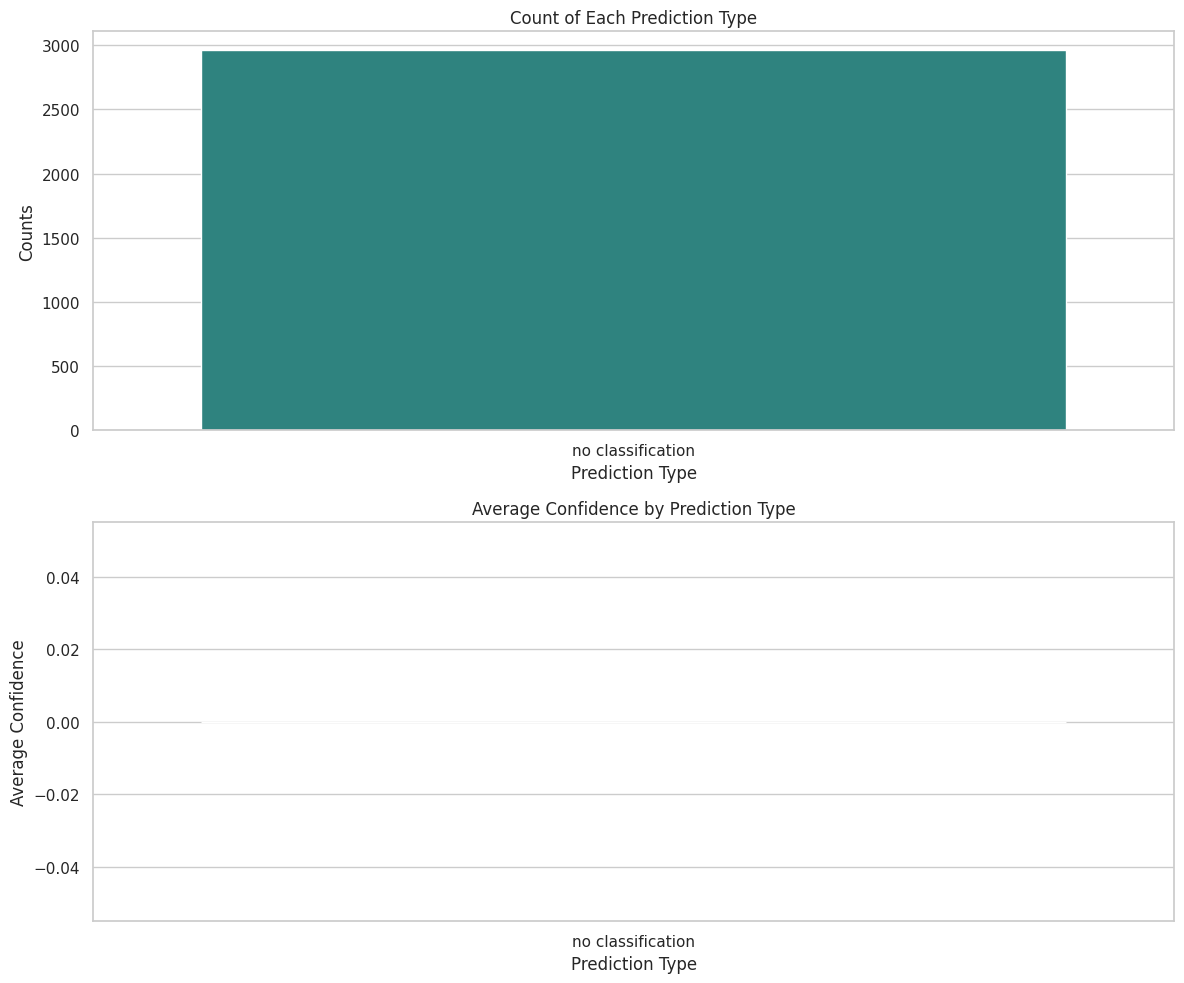

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set(style="whitegrid")

# Load the CSV file
data = pd.read_csv("updated_predictions.csv")

# Count occurrences of each prediction
prediction_counts = data['Prediction'].value_counts()

# Calculate the average confidence for each prediction category
average_confidence = data.groupby('Prediction')['Confidence'].mean()

# Create a figure to hold the plots
plt.figure(figsize=(12, 10))

# Create the first subplot for prediction counts
plt.subplot(2, 1, 1)  # (rows, columns, panel number)
sns.barplot(x=prediction_counts.index, y=prediction_counts.values, palette="viridis")
plt.title('Count of Each Prediction Type')
plt.ylabel('Counts')
plt.xlabel('Prediction Type')

# Create the second subplot for average confidence
plt.subplot(2, 1, 2)
sns.barplot(x=average_confidence.index, y=average_confidence.values, palette="magma")
plt.title('Average Confidence by Prediction Type')
plt.ylabel('Average Confidence')
plt.xlabel('Prediction Type')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()


In [5]:
# import pandas as pd

# # Load the CSV file
# data = pd.read_csv("updated_predictions.csv")

# # Filter the DataFrame to only include rows where 'Prediction' is 'no_classification'
# no_classification_data = data[data['Prediction'] == 'no classification']

# # Save the filtered data to a new CSV file
# no_classification_data.to_csv("no_classification_images.csv", index=False)


In [7]:
import pandas as pd
import os
from PIL import Image
import ipywidgets as widgets
from IPython.display import display, clear_output
import matplotlib.pyplot as plt

# Load the CSV file
data = pd.read_csv("updated_predictions.csv")
#data = pd.read_csv("no_classification_images.csv")

# Directory where images are stored
#image_dir = "runs/detect/exp20/" lisää (n) kohdalle minkä mallin kuvia tutkitaan
image_dir = "../yolov5/runs/detect/exp/"
# Create a dropdown to select the image
dropdown = widgets.Dropdown(
    options = data['Image Name'].tolist(),
    value = data['Image Name'].tolist()[0],
    description = 'Select Image:',
    disabled = False,
)

# Button to load the selected image
button = widgets.Button(description="Open Image")

# Display function for the image
def on_button_clicked(b):
    with output:
        clear_output(wait=True)  # Clear the existing output
        image_path = os.path.join(image_dir, dropdown.value)
        if os.path.exists(image_path):
            img = Image.open(image_path)
            plt.figure(figsize=(10, 6))
            plt.imshow(img)
            plt.axis('off')  # Hide axes
            plt.show()
        else:
            print(f"Image not found: {image_path}")

# Output widget to display image
output = widgets.Output()

# Button click event
button.on_click(on_button_clicked)

# Display widgets and output
display(dropdown, button, output)


Dropdown(description='Select Image:', options=('100000_kultsieki.jpg', '100004_SMMH.jpg', '100006_ouzou.jpg', …

Button(description='Open Image', style=ButtonStyle())

Output()